### PROJECT - SQL-BASED ANALYSIS OF PRODUCT SALES
## Project Summary  

This project involved analyzing music store sales data using SQL and Python (SQLite + Pandas).  
The goal was to explore revenue trends, customer behavior, and product performance.  

Key steps included:  
- **Data Cleaning & Exploration** – Checked tables, relationships, and key attributes.  
- **Sales Analysis** – Calculated total sales by joining invoices, invoice lines, and tracks.  
- **Top Products & Albums** – Identified best-selling tracks and albums.  
- **Regional Insights** – Compared revenue across different countries.  
- **Time-based Trends** – Analyzed monthly revenue to detect seasonal patterns.

In [13]:
#import required libraries
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

In [14]:
#connect to SQLite
conn = sqlite3.connect(r"C:\Users\ud\Desktop\Chinook_Sqlite.sqlite")

#show all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [15]:
#list of all tables
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
)

for table in tables['name']: #loop through tables
    print(f"\n Table: {table}")
    cols = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    print(cols[['name', 'type']])  # only show column names and data type


 Table: Album
       name           type
0   AlbumId        INTEGER
1     Title  NVARCHAR(160)
2  ArtistId        INTEGER

 Table: Artist
       name           type
0  ArtistId        INTEGER
1      Name  NVARCHAR(120)

 Table: Customer
            name          type
0     CustomerId       INTEGER
1      FirstName  NVARCHAR(40)
2       LastName  NVARCHAR(20)
3        Company  NVARCHAR(80)
4        Address  NVARCHAR(70)
5           City  NVARCHAR(40)
6          State  NVARCHAR(40)
7        Country  NVARCHAR(40)
8     PostalCode  NVARCHAR(10)
9          Phone  NVARCHAR(24)
10           Fax  NVARCHAR(24)
11         Email  NVARCHAR(60)
12  SupportRepId       INTEGER

 Table: Employee
          name          type
0   EmployeeId       INTEGER
1     LastName  NVARCHAR(20)
2    FirstName  NVARCHAR(20)
3        Title  NVARCHAR(30)
4    ReportsTo       INTEGER
5    BirthDate      DATETIME
6     HireDate      DATETIME
7      Address  NVARCHAR(70)
8         City  NVARCHAR(40)
9        State  NVAR

In [16]:
#top selling products
query= """ 
SELECT t.Name AS Track,
       a.Title AS Album,
       SUM(il.UnitPrice * il.Quantity) AS Total_Sales
FROM InvoiceLine AS il
JOIN Track AS t 
ON il.TrackId = t.TrackId
JOIN Album AS a 
ON t.AlbumId = a.AlbumId
GROUP BY t.TrackId
ORDER BY Total_Sales DESC
LIMIT 10;
"""
top_products = pd.read_sql_query(query, conn)
print(top_products)

                          Track                           Album  Total_Sales
0                The Woman King  Battlestar Galactica, Season 3         3.98
1                       The Fix                Heroes, Season 1         3.98
2                     Walkabout                  Lost, Season 1         3.98
3                      Hot Girl            The Office, Season 1         3.98
4                Gay Witch Hunt            The Office, Season 3         3.98
5             Phyllis's Wedding            The Office, Season 3         3.98
6  How to Stop an Exploding Man                Heroes, Season 1         3.98
7                         Pilot                         Aquaman         3.98
8        Occupation / Precipice  Battlestar Galactica, Season 3         1.99
9                 Exodus, Pt. 1  Battlestar Galactica, Season 3         1.99


### Insights from Top-Selling Products
- TV series soundtracks dominate sales, with shows like The Office and Heroes contributing multiple top-selling tracks. This indicates a strong customer interest in popular culture and TV-related contents. 
- Most bestsellers are priced at $3.98, showing that this price point is highly effective in driving sales  
- Customers favor purchasing individual tracks/episodes rather than entire albums, suggesting convenience and selectivity drive buying behavior. 
- Repeat sales from shows across multiple seasons (e.g., *The Office*) highlight strong fan bases. 

In [17]:
#revenue by Region
query = """
SELECT c.Country,
       ROUND(SUM(i.Total), 2) AS Revenue
FROM Invoice AS i
JOIN Customer AS c 
ON i.CustomerId = c.CustomerId
GROUP BY c.Country
ORDER BY Revenue DESC
LIMIT 10;
"""
revenue_region = pd.read_sql_query(query, conn)
print(revenue_region)

          Country  Revenue
0             USA   523.06
1          Canada   303.96
2          France   195.10
3          Brazil   190.10
4         Germany   156.48
5  United Kingdom   112.86
6  Czech Republic    90.24
7        Portugal    77.24
8           India    75.26
9           Chile    46.62


### Revenue by Region Insights: 
- The USA leads as the strongest market with the highest revenue ($523.06), followed by Canada, making North America the dominant region overall.
- European countries like France, Germany, and the UK are key secondary markets, providing steady income.
- Emerging markets such as Brazil and India show notable sales, highlighting opportunities for growth.
- Chile records the lowest revenue among the top 10, suggesting weaker demand in smaller regions.

In [18]:
#monthly performance
query = """
SELECT strftime('%Y - %m', InvoiceDate) AS Month,
       ROUND(SUM(Total), 2) AS Revenue
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""
monthly_perf = pd.read_sql_query(query, conn)
print(monthly_perf)

        Month  Revenue
0   2009 - 01    35.64
1   2009 - 02    37.62
2   2009 - 03    37.62
3   2009 - 04    37.62
4   2009 - 05    37.62
5   2009 - 06    37.62
6   2009 - 07    37.62
7   2009 - 08    37.62
8   2009 - 09    37.62
9   2009 - 10    37.62
10  2009 - 11    37.62
11  2009 - 12    37.62
12  2010 - 01    52.62
13  2010 - 02    46.62
14  2010 - 03    44.62
15  2010 - 04    37.62
16  2010 - 05    37.62
17  2010 - 06    37.62
18  2010 - 07    37.62
19  2010 - 08    37.62
20  2010 - 09    36.63
21  2010 - 10    37.62
22  2010 - 11    37.62
23  2010 - 12    37.62
24  2011 - 01    37.62
25  2011 - 02    37.62
26  2011 - 03    37.62
27  2011 - 04    51.62
28  2011 - 05    42.62
29  2011 - 06    50.62
30  2011 - 07    37.62
31  2011 - 08    37.62
32  2011 - 09    37.62
33  2011 - 10    37.62
34  2011 - 11    23.76
35  2011 - 12    37.62
36  2012 - 01    37.62
37  2012 - 02    37.62
38  2012 - 03    37.62
39  2012 - 04    37.62
40  2012 - 05    37.62
41  2012 - 06    37.62
42  2012 - 

### Monthly Performance Insights 
- Revenue stayed relatively stable across most months.
- Significant spikes occurred in Jan 2010, Apr & Jun 2011, Aug 2012, and Nov 2013. These peaks suggest seasonal or promotional boosts.
- Sharp declines were seen in Nov 2011 and Feb 2013, indicating potential dips in customer activity or lower sales campaigns.

In [19]:
#Use of RANK() function
query= """
SELECT CustomerId,
       ROUND(SUM(Total), 2) AS Revenue,
       RANK() OVER (ORDER BY SUM(Total) DESC) AS Rank
FROM Invoice
GROUP BY CustomerId
LIMIT 10;
"""
top_customers = pd.read_sql_query(query, conn)
print(top_customers)

   CustomerId  Revenue  Rank
0           6    49.62     1
1          26    47.62     2
2          57    46.62     3
3          45    45.62     4
4          46    45.62     4
5          28    43.62     6
6          24    43.62     7
7          37    43.62     7
8           7    42.62     9
9          25    42.62     9


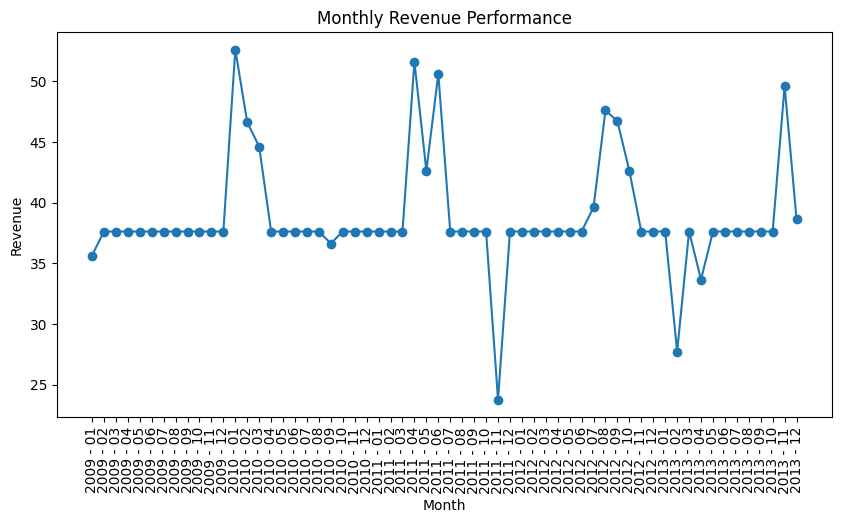

In [20]:
# Plot for monthly revenue
plt.figure(figsize=(10,5))
plt.plot(monthly_perf["Month"], monthly_perf["Revenue"], marker='o')
plt.xticks(rotation=90)
plt.title("Monthly Revenue Performance")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


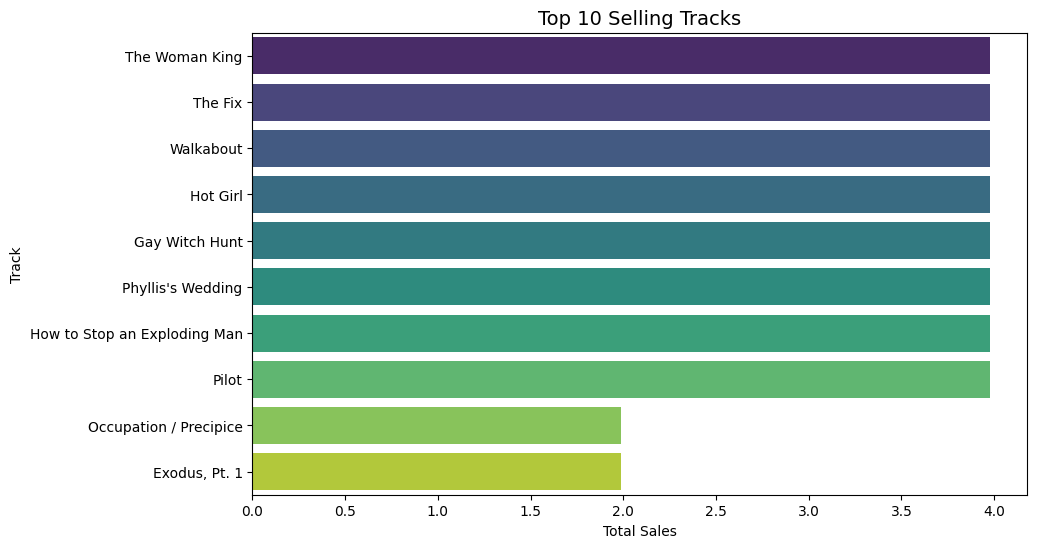

In [21]:
import seaborn as sns

#Bar Chart for Top selling products
plt.figure(figsize=(10,6))
sns.barplot(
    x="Total_Sales", 
    y="Track", 
    data=top_products, 
    hue="Track",      #link palette to track
    palette="viridis", 
    legend=False        
)
plt.title("Top 10 Selling Tracks", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Track")
plt.show()

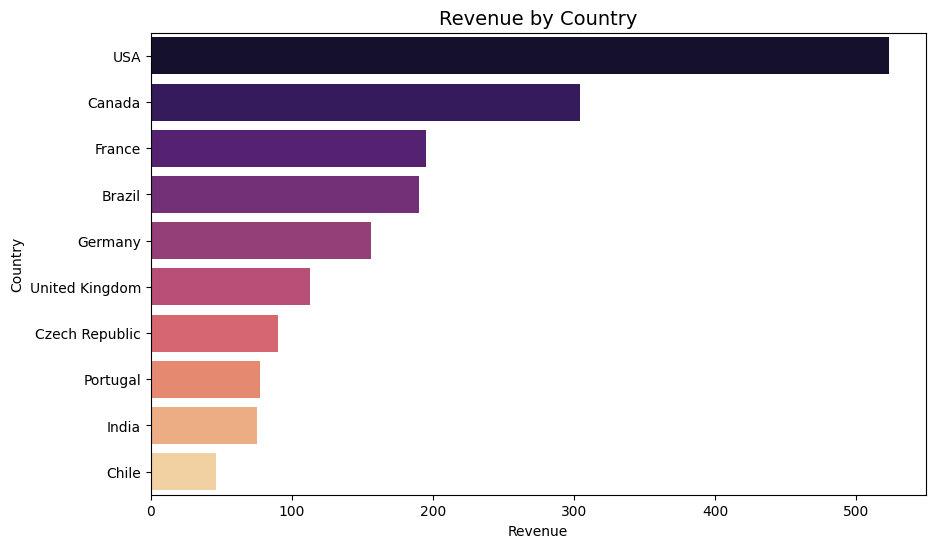

In [22]:
# Bar Chart for Revenue by Country 
plt.figure(figsize=(10,6))
sns.barplot(
    x="Revenue", 
    y="Country", 
    data=revenue_region, 
    hue="Country",       #link palette to Country
    palette="magma", 
    legend=False         
)
plt.title("Revenue by Country", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()
